# Pointing Experiment

## Testdesign

In our study we want to implement an experiment about pointing devices. For this, we have developed a hypothesis that we want to either confirm or reject through our experiment. Our hypothesis is, that reaction time and correctness deteriorate when the user is exposed to multiple visual stimuli. In our case, the different stimuli are different colors and geometric shapes among which the subject has to find the right one.
 Therefore we have developed three conditions with different levels of difficulty:
 
    1. Circles of different sizes are displayed on the screen. One circle is blue, the test person has to click on it as fast as possible.
    
    2. Circles of different sizes and colors are displayed on the screen. One circle is blue, the test person has to click on it as fast as possible.
    
    3. Varying geometric shapes of different sizes and colors are displayed on the screen. One circle is blue, the test person has to click on it as fast as possible.
    
Each object is clickable, the participants have to click on the right one, otherwise it would be an error. Each condition is repeated five times, so that there are 15 rounds in total and in a counter-balanced order. 
In Addition we also implemented a improved pointing technique. Therefore pur second hypothesis is, that participants who use the improved pointing technique should complete the task faster.

### Participants

To conduct a good study our participants should be as diverse as possible to avoid biased results. Due to limited resources, this study is only conducted by two female participants, both of whom have good computer skills. This should be taken into account in the results and in studies based on them.

### Setup

In order to create a comparable setup, this was discussed and determined before conducting the study. We used a Laptop with a screen size of 13 inches and a mouse as the pointing device. The participants are seated in a closed room to minimize disturbing influences such as noise or dazzling light.

### Variables

Two independent variables were defined for the study, which also resulted in two dependent variables. The independent variables are the color and the shape of the objects and the dependent variables the reaction time and the error.
We also have five controlled variables which are the pointing device (mouse), screen resolution, screen size, screen position, environment. As previously said, we determined the setup before to minimize their influence.


## Import packages

In [32]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

## Import csv and grouping of data

In [39]:
# import csv data
df_data1 = pd.read_csv('data1.csv')
df_data2 = pd.read_csv('data2.csv')
df_data3 = pd.read_csv('data3.csv')
df_data4 = pd.read_csv('data4.csv')
df_data5 = pd.read_csv('data5.csv')
df_data6 = pd.read_csv('data6.csv')
df_data7 = pd.read_csv('data7.csv')
df_data8 = pd.read_csv('data8.csv')
df_data5

,timestamp (ISO),user_id,condition,diameter,amount,completion_time (ms),start_pointer_x,start_pointer_y,end_pointer_x,end_pointer_y,error,improvement
0,2021-05-07T12:46:41,1,1,125,20,860,1175,453,1057,637,True,True
1,2021-05-07T12:46:42,1,3,50,20,1657,1057,637,295,235,True,True
2,2021-05-07T12:46:43,1,2,75,20,1030,295,235,1742,242,True,True
3,2021-05-07T12:46:45,1,2,125,20,1389,1742,242,137,217,True,True
4,2021-05-07T12:46:46,1,1,125,20,885,137,217,1357,497,True,True
5,2021-05-07T12:46:47,1,1,100,20,1269,1357,497,1010,590,True,True
6,2021-05-07T12:46:48,1,3,125,20,837,1010,590,497,197,True,True
7,2021-05-07T12:46:49,1,3,100,20,1090,497,197,1710,350,True,True
8,2021-05-07T12:46:50,1,1,100,20,1587,1710,350,730,670,True,True
9,2021-05-07T12:46:52,1,2,125,20,1445,730,670,237,577,True,True


In [40]:
# grouping csv data in one document
df_pointing_experiment = pd.concat([df_data1, df_data2, df_data3, df_data4, df_data5, df_data6, df_data7, df_data8], ignore_index= True)

,timestamp (ISO),user_id,condition,diameter,amount,completion_time (ms),start_pointer_x,start_pointer_y,end_pointer_x,end_pointer_y,error,improvement
0,2021-05-07T12:25:00,1,2,125,20,1547,1024,638,1549,281,True,False
1,2021-05-07T12:25:02,1,3,50,20,2291,1549,281,1571,318,True,False
2,2021-05-07T12:25:05,1,3,50,20,2868,1571,318,945,228,False,False
3,2021-05-07T12:25:06,1,1,50,20,1116,945,228,1012,298,True,False
4,2021-05-07T12:25:08,1,2,125,20,1543,1012,298,1601,395,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-05-07T12:49:16,4,1,50,20,1250,1367,200,1581,114,True,False
116,2021-05-07T12:49:18,4,2,50,20,1811,1581,114,430,550,True,False
117,2021-05-07T12:49:19,4,3,75,20,1813,430,550,719,528,True,False
118,2021-05-07T12:49:21,4,1,50,20,1649,719,528,221,443,True,False


In [35]:
# group csv data per condition
df_cond1 = df_pointing_experiment[df_pointing_experiment['condition'] == 1]
df_cond2 = df_pointing_experiment[df_pointing_experiment['condition'] == 2]
df_cond3 = df_pointing_experiment[df_pointing_experiment['condition'] == 3]

In [41]:
# group csv data if improvement is true or false
df_impr_true = df_pointing_experiment[df_pointing_experiment['improvement'] == True]
df_impr_false = df_pointing_experiment[df_pointing_experiment['improvement'] == False]

,timestamp (ISO),user_id,condition,diameter,amount,completion_time (ms),start_pointer_x,start_pointer_y,end_pointer_x,end_pointer_y,error,improvement
15,2021-05-07T12:26:49,2,3,75,20,1182,975,436,102,302,True,True
16,2021-05-07T12:26:50,2,3,50,20,1283,102,302,415,655,True,True
17,2021-05-07T12:26:52,2,3,50,20,2126,415,655,1375,155,True,True
18,2021-05-07T12:26:53,2,3,50,20,1187,1375,155,1555,595,True,True
19,2021-05-07T12:26:54,2,2,50,20,963,1555,595,1015,395,True,True
20,2021-05-07T12:26:55,2,1,100,20,1082,1015,395,630,490,True,True
21,2021-05-07T12:26:57,2,2,50,20,1495,630,490,1115,715,True,True
22,2021-05-07T12:26:58,2,1,125,20,1237,1115,715,1017,377,True,True
23,2021-05-07T12:26:59,2,1,75,20,1088,1017,377,1482,222,True,True
24,2021-05-07T12:27:00,2,3,125,20,1001,1482,222,357,337,True,True


## Evaluation

### Completion time per condition without improvement


In [291]:
cond1_impr_false = df_cond1['completion_time (ms)'][df_cond1['improvement'] == False]
cond2_impr_false = df_cond2['completion_time (ms)'][df_cond2['improvement'] == False]
cond3_impr_false = df_cond3['completion_time (ms)'][df_cond3['improvement'] == False]

Text(0, 0.5, 'completion time in ms')

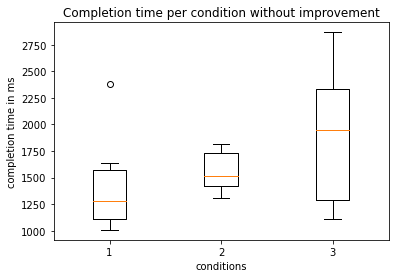

In [292]:
plt.boxplot([cond1_impr_false, cond2_impr_false, cond3_impr_false])
plt.title('Completion time per condition without improvement')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')


## Completion time per condition and per user

In [293]:
cond_user1 = df_impr_false['condition'][df_impr_false['user_id'] == 1]
cond_user1_time = df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 1]
cond_user2 = df_impr_false['condition'][df_impr_false['user_id'] == 2]
cond_user2_time= df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 2]
cond_user3 = df_impr_false['condition'][df_impr_false['user_id'] == 3]
cond_user3_time = df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 3]
cond_user4 = df_impr_false['condition'][df_impr_false['user_id'] == 4]
cond_user4_time = df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 4]

(0.5, 3.5)

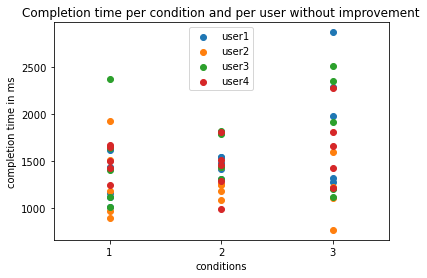

In [294]:
plt.scatter(cond_user1, cond_user1_time, label='user1')
plt.scatter(cond_user2, cond_user2_time, label='user2')
plt.scatter(cond_user3, cond_user3_time, label='user3')
plt.scatter(cond_user4, cond_user4_time, label='user4')
plt.legend(loc=0)
plt.title('Completion time per condition and per user without improvement')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)

### Errors per condition without improvement

In [146]:
err_cond = [1, 2, 3]
cond1_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False].count() 
cond1_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True].count()
cond2_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False].count()
cond2_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True].count()
cond3_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False].count()
cond3_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True].count()

(0.5, 3.5)

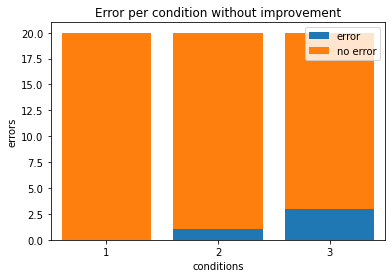

In [289]:
plt.bar(err_cond, (cond1_false, cond2_false, cond3_false), label='error')
plt.bar(err_cond, (cond1_true, cond2_true , cond3_true), bottom=(cond1_false, cond2_false, cond3_false), label='no error')
plt.title('Error per condition without improvement')
plt.xlabel('conditions')
plt.ylabel('errors')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)

### Error per condition and per user without improvement

In [275]:
cond1_user1_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 1].count() 
cond1_user1_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 1].count()
cond1_user2_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 2].count() 
cond1_user2_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 2].count()
cond1_user3_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 3].count() 
cond1_user3_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 3].count()
cond1_user4_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 4].count() 
cond1_user4_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 4].count()
cond2_user1_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 1].count() 
cond2_user1_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 1].count()
cond2_user2_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 2].count() 
cond2_user2_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 2].count()
cond2_user3_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 3].count() 
cond2_user3_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 3].count()
cond2_user4_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 4].count() 
cond2_user4_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 4].count()
cond3_user1_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 1].count() 
cond3_user1_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 1].count()
cond3_user2_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 2].count() 
cond3_user2_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 2].count()
cond3_user3_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 3].count() 
cond3_user3_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 3].count()
cond3_user4_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 4].count() 
cond3_user4_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 4].count()

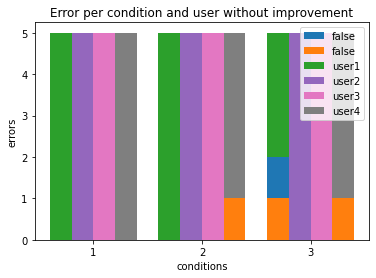

In [287]:
x = np.arange(3)
plt.title('Error per condition and user without improvement')
width = 0.2
user1_false = plt.bar(x, (cond1_user1_false, cond2_user1_false, cond3_user1_false), label= 'false')
user4_false = plt.bar(x, (cond1_user4_false, cond2_user4_false, cond3_user4_false), label= 'false')
user1_true = plt.bar(x - 0.3, [cond1_user1_true, cond2_user1_true, cond3_user1_true], width, bottom= (cond1_user1_false, cond2_user1_false, cond3_user1_false), label='user1')
user2_false = plt.bar(x, (cond1_user2_false, cond2_user2_false, cond3_user2_false))
user2_true = plt.bar(x - 0.1, [cond1_user2_true, cond2_user2_true, cond3_user2_true], width, bottom=(cond1_user2_false, cond2_user2_false, cond3_user2_false), label='user2')
user3_false = plt.bar(x, (cond1_user3_false, cond2_user3_false, cond3_user3_false))
user3_true = plt.bar(x + 0.1, [cond1_user3_true, cond2_user3_true, cond3_user3_true], width, bottom=(cond1_user3_false, cond2_user3_false, cond3_user3_false), label='user3')
user4_true = plt.bar(x + 0.3, [cond1_user4_true, cond2_user4_true, cond3_user4_true], width, bottom= (cond1_user4_false, cond2_user4_false, cond3_user4_false), label='user4')
plt.xlabel('conditions')
plt.xticks(x, ['1', '2', '3'])
plt.ylabel('errors')
plt.legend()